In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
from PIL import Image
import numpy as np
import json
from time import sleep



In [2]:
chrome_driver = ChromeDriverManager().install()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\mkarc\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache


In [3]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\mkarc\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache
c:\Users\mkarc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """Entry point for launching an IPython kernel.


In [4]:
with open('settings.json',"r", encoding="utf-8") as f:
    login_password = json.load(f)
log_path = 'https://mapa-turystyczna.pl/login'
path ='https://mapa-turystyczna.pl/account/route/1391934'

In [5]:
driver.get(log_path)

In [6]:
#accept cookies
driver.find_element(By.CLASS_NAME,'fc-button-label').click()


In [7]:
login_password["login"]
login_password["password"]

'białydunajec'

In [8]:
#login 
driver.find_element(By.NAME,"signin[username]").send_keys(login_password["login"]) 
driver.find_element(By.NAME,"signin[password]").send_keys(login_password["password"]) 
driver.find_element(By.CSS_SELECTOR,'.mdl-button--primary.mdl-button--primary.mdl-button--raised').click()
sleep(2)



In [9]:
driver.get(path)

In [10]:
# get html code to scrap data such as distance
html = driver.page_source


In [11]:
soup = BeautifulSoup(html)
heightest_point =soup.find('div', class_='ts-user-activity__data-inline-item').get_text()[25:].replace('\n','').replace('\t','').replace(',',', ')
index = heightest_point.find(', ')
max_height = int(heightest_point[index+2:index + 6])
max_height

1211

In [12]:
data = soup.find_all("span", class_= 'ts-user-activity__data-item-value ts-user-activity__data-item-value--primary')
distance = data[0].get_text().strip()
true_time = data[1].get_text().strip()
up = data[2].get_text().strip()
down = data[3].get_text().strip()

In [13]:
true_time

'4:47 h'

In [36]:
def true_time_to_time(scrap_time : str , mul : float ):  
    """Czas zeskrapowany w formacie hh:mm 'h' zminia na sa hh 'h' mnożąc czas przes zdefiniowaną stałą np 
    4:47 h zmienia na 6 h dla stałej wynoszącej 1.2"""
    time = scrap_time[:-2]
    return str(round((int(time[0]) + int(time[2:4])/60) * mul )) + ' h'

In [37]:
true_time_to_time(true_time,1.2)

'6 h'

In [34]:
true_time[2:4]

'47'

In [14]:

profil_json= json.loads(soup.find('div', class_="ts-user-activity__profile ts-profile-container").attrs["data-profile"])

min_height = 2000
for dict in profil_json['segments']:
    # print(dict)
    temp = dict['elevation']
    if temp < min_height:
        min_height = temp

print(min_height)
elevation_gain = f'{int(max_height - min_height)} m'
print(elevation_gain)

386.464996
824 m


In [15]:
#go to proile and save it 
driver.get(path + '/profile')
sleep(1)
select = Select(driver.find_element(By.ID,'profile-size-type'))
select.select_by_visible_text('Szeroki')
driver.find_element(By.ID,'ts-ep-static').screenshot('zdjecie.png')

True

In [3]:
#cover time in profile
img= Image.open('zdjecie.png')
im = np.array(img)
im[0:65,0:400] = [255, 255, 255, 255]
Image.fromarray(im).save('zdjecie.png')

In [5]:
im.shape

(362, 960, 4)

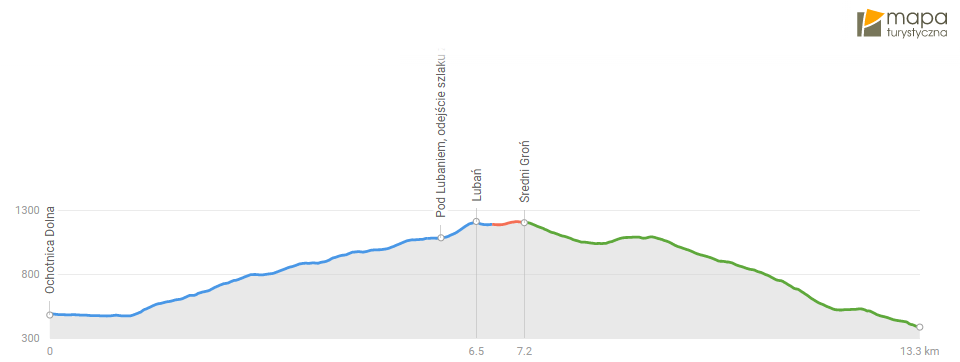

In [6]:
img